In [121]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
import glob
import numpy as np
from tabula import read_pdf
cwd = os.getcwd()
base_path = join(cwd, '..')
data_path = join(base_path, 'Data storage', 'final state data')
fig_export_path = join(base_path, 'Figures')

In [32]:
us_state_abbrev = {
    'United States': 'US',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

## Read CPP state goals

In [2]:
pd_options = {'header': [0, 1],
              'thousands': ','}
path = 'https://blog.epa.gov/blog/wp-content/uploads/2015/08/State-tables-tab-1.pdf'
cpp_goals = read_pdf(path, pandas_options=pd_options)
cpp_goals.columns = ['state', '2012 rate (lb/MWh)', '2030 goal (lb/MWh)', '% Change']

In [3]:
cpp_goals.dtypes

State                 object
2012 rate (lb/MWh)     int64
2030 goal (lb/MWh)     int64
% Change              object
dtype: object

In [4]:
cpp_goals.tail()

,State,2012 rate (lb/MWh),2030 goal (lb/MWh),% Change
40,Texas,1553,1042,33%
41,Utah,1790,1179,34%
42,Virginia,1366,934,32%
43,Washington,1566,983,37%
44,West Virginia,2064,1305,37%


Need to add the two states from the second page of the pdf

In [5]:
extra_states = {'state': ['Wisconsin', 'Wyoming'],
                '2012 rate (lb/MWh)': [1996, 2315],
                '2030 goal (lb/MWh)': [1176, 1299],
                '% Change': ['41%', '44%']}

cpp_goals = cpp_goals.append(pd.DataFrame(data=extra_states, index=[45, 46]))

In [6]:
cpp_goals['2030 goals (g/kwh)'] = cpp_goals['2030 goal (lb/MWh)'] / 2.2046

In [2]:
us_state_abbrev = {
    'United States': 'US',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [8]:
cpp_goals['state'] = cpp_goals['state'].map(us_state_abbrev)

In [9]:
cpp_goals.set_index('state', inplace=True)

In [10]:
cpp_goals.head()

,% Change,2012 rate (lb/MWh),2030 goal (lb/MWh),2030 goals (g/kwh)
State,,,,
AL,33%,1518,1018,461.761771
AZ,34%,1552,1031,467.658532
AR,38%,1816,1130,512.564638
CA,13%,954,828,375.578336
CO,38%,1904,1174,532.522907


## Import & combine generation and CO₂ intensity data

CO₂ intensity

In [122]:
index_path = join(data_path, 'Monthly index states.csv')
monthly_index = pd.read_csv(index_path)

In [123]:
annual_index = monthly_index.groupby(['state', 'year']).sum()
annual_index.drop(['month', 'quarter'], axis=1, inplace=True)
annual_index['index (g/kwh)'] = (annual_index['final co2 (kg)']
                                 / annual_index['generation (mwh)'])
annual_index.head()

final co2 (kg)  generation (mwh)  index (g/kwh)
state year                                                 
AK    2001    4.192005e+09        6743766.00     621.611811
      2002    3.829370e+09        6767322.00     565.861881
      2003    3.474673e+09        6338738.00     548.164719
      2004    3.492072e+09        6526716.92     535.042680
      2005    3.531411e+09        6576658.54     536.961208

Generation

In [124]:
gen_path = join(data_path, 'Monthly generation states.csv')
monthly_gen = pd.read_csv(gen_path)

In [125]:
annual_gen = monthly_gen.groupby(['fuel category', 'state', 'year']).sum()
annual_gen.drop(['month', 'quarter'], axis=1, inplace=True)
annual_gen.head()

generation (mwh)  total fuel (mmbtu)  \
fuel category state year                                         
Coal          AK    2001         564593.00          14858000.0   
                    2002         575286.00          13086000.0   
                    2003         549665.00          12792000.0   
                    2004         648979.71          13566410.0   
                    2005         624317.77          13285200.0   

                          elec fuel (mmbtu)  all fuel co2 (kg)  \
fuel category state year                                         
Coal          AK    2001         11124000.0       1.415224e+09   
                    2002          8005000.0       1.246442e+09   
                    2003          8153000.0       1.218438e+09   
                    2004          7815580.0       1.292201e+09   
                    2005          7445360.0       1.265415e+09   

                          elec fuel co2 (kg)  
fuel category state year                      
Coal          AK    2001        1.059561e+09  
                    2002        7.624762e+08  
                    2003        7.765732e+08  
                    2004        7.444340e+08  
                    2005        7.091705e+08

Old method and data - still figuring out what the error was.

In [108]:
def make_gen_index(data_folder, time='Monthly'):
    """
    Read and combine the state-level generation and index files
    
    inputs:
        data_folder: (str or path) path to the state-level data files
        time: (str) "Monthly", "Quarterly", or "Annual"
        
    outputs:
        gen_index: (df) a dataframe with combined generation and index data
    """
    
    index_path = os.path.join(data_folder, '{} index*'.format(time))
    gen_path = os.path.join(data_folder, '{} gen*'.format(time))
    
    # Get filenames and list of state abbreviations
    index_fns = glob.glob(index_path)
    gen_fns = glob.glob(gen_path)
    
    # Not sure why, but DC shows up in index but not gen
    index_states = [f.split('.')[-2][-2:] for f in index_fns]
    gen_states = [f.split('.')[-2][-2:] for f in gen_fns]
    
    # Read and combine files into single dataframes
    def read_combine(paths, states):
        df_list = []
        for f, state in zip(paths, states):
            df = pd.read_csv(f)
            df['state'] = state
            df_list.append(df)
        
        full_df = pd.concat(df_list)
        full_df.reset_index(inplace=True, drop=True)
        full_df.rename(columns={'year': 'year'},
                       inplace=True)
        
        if 'datetime' in full_df.columns:
            full_df['datetime'] = pd.to_datetime(full_df['datetime'])
        
        return full_df
    
    index_df = read_combine(index_fns, index_states)
    gen_df = read_combine(gen_fns, gen_states)
    
    # Different timescales will pivot on different columns
    gen_pivot_col = {'Monthly': ['year', 'datetime'],
                     'Quarterly': ['year', 'year_quarter'],
                     'Annual': ['year']}
    
    gen_pivot = pd.pivot_table(gen_df, index=['state'] + gen_pivot_col[time], 
                               values='generation (MWh)', columns='fuel category')
    gen_pivot.reset_index(inplace=True, drop=False)
    gen_pivot.replace(np.nan, 0, inplace=True)
    
    # Merge gen and index dataframes
    merge_col = {'Monthly': ['datetime'],
                 'Quarterly': ['year_quarter'],
                 'Annual': ['year']}
    
    gen_index = pd.merge(gen_pivot, index_df[merge_col[time] + ['state', 'index (g/kWh)', 'final CO2 (kg)']], 
                         on=merge_col[time] + ['state'])
    
    return gen_index, gen_df

In [109]:
data_path = os.path.join(base_path, 'Data storage', 'final state data', 'archive')
monthly_gen_index, monthly_gen = make_gen_index(data_path, time='Monthly')
annual_gen_index, annual_gen = make_gen_index(data_path, time='Annual')

In [110]:
annual_gen_index.head()

,state,year,Coal,Hydro,Natural Gas,Nuclear,Other,Other Renewables,Solar,Wind,index (g/kWh),final CO2 (kg)
0,AK,2001,564593.00,1345664.00,3895568.00,0.0,936990.00,0.00,0.0,951.00,621.611811,4.192005e+09
1,AK,2002,575286.00,1439351.00,3778161.00,0.0,962369.00,12155.00,0.0,0.00,565.861881,3.829370e+09
2,AK,2003,549665.00,1582537.00,3354483.00,0.0,846273.00,5780.00,0.0,0.00,548.164631,3.474672e+09
3,AK,2004,648979.71,1498020.01,3623432.59,0.0,747068.06,9216.55,0.0,0.00,535.042680,3.492072e+09
4,AK,2005,624317.77,1463942.01,3723625.63,0.0,758928.54,5255.58,0.0,589.01,536.961208,3.531411e+09


### Add a CO₂ intensity for CPP
Only fossil gen over fossil CO₂

In [18]:
fossil_gen = ['Coal', 'Natural Gas', 'Other']
annual_gen_index['Fossil'] = annual_gen_index.loc[:, fossil_gen].sum(axis=1)
annual_gen_index['CPP g/kWh'] = (annual_gen_index['final CO2 (kg)']
                                 / annual_gen_index['Fossil'])

In [13]:
annual_gen_index.head()

,State,Year,Coal,Hydro,Natural Gas,Nuclear,Other,Other Renewables,Solar,Wind,index (g/kWh),final CO2 (kg)
0,AK,2001,564593.00,1345664.00,3895568.00,0.0,936990.00,0.00,0.0,951.00,621.611811,4.192005e+09
1,AK,2002,575286.00,1439351.00,3778161.00,0.0,962369.00,12155.00,0.0,0.00,565.861881,3.829370e+09
2,AK,2003,549665.00,1582537.00,3354483.00,0.0,846273.00,5780.00,0.0,0.00,548.164631,3.474672e+09
3,AK,2004,648979.71,1498020.01,3623432.59,0.0,747068.06,9216.55,0.0,0.00,535.042680,3.492072e+09
4,AK,2005,624317.77,1463942.01,3723625.63,0.0,758928.54,5255.58,0.0,589.01,536.961208,3.531411e+09


## State RPS information
Use data from [LBNL](https://emp.lbl.gov/publications/us-renewables-portfolio-standards-0) to determine what year each state's RPS required that renewable energy be procured.

In [29]:
path = os.path.join(base_path, 'Data storage',
                    'rps_compliance_data_july_2017.xlsx')
rps = pd.read_excel(path, header=35, parse_cols='A:V', na_values=['-'])

rps.index = rps.index.droplevel([1, 2])

rps.index.names = ['state', 'Type']

rps_tidy = pd.melt(rps.xs('Total RPS', level='Type').reset_index(), 
                   id_vars='state', var_name='year', value_vars=rps.columns, 
                   value_name='Generation').dropna().sort_values(['state', 'year'])

rps_start = {}
for state in rps_tidy['state'].unique():
    first_year = rps_tidy.loc[rps_tidy['state'] == state, 'year'].min()
    rps_start[state] = first_year

In [30]:
rps_start

{'AZ': 2001,
 'CA': 2004,
 'CO': 2007,
 'CT': 2004,
 'DC': 2007,
 'DE': 2007,
 'HI': 2005,
 'IA': 1999,
 'IL': 2008,
 'KS': 2011,
 'MA': 2003,
 'MD': 2006,
 'ME': 2000,
 'MI': 2012,
 'MN': 2002,
 'MO': 2011,
 'MT': 2008,
 'NC': 2010,
 'NH': 2008,
 'NJ': 2001,
 'NM': 2006,
 'NV': 2003,
 'NY': 2006,
 'OH': 2009,
 'OR': 2011,
 'PA': 2006,
 'RI': 2007,
 'TX': 2002,
 'WA': 2012,
 'WI': 2000}

## Dumbell plot of annual state index

### Dumbell plot code
https://github.com/iturki/Data-Analysis-and-Visualization-Projects/blob/master/dumbbell-chart-python/dumbbbell_plot.py

In [17]:
sns.set()
sns.set_style('white')

This version of the plot is probably better/more flexible

In [27]:
def dumbell_plot(data, years, axis_labels, legend_loc=[], offset_divider=35,
                 rps_start={}, fig_kwargs={}, figsize=(5,9), legend=True,
                 text_h_align='right', palette='deep'):
    '''
    This is an example to create a dumbbell chart in Python.
    If you would like to provide your data and customize the graph, modify the variables in the section below.
    Please be aware that you need matplotlib installed in order for this to work.
    '''
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = sns.color_palette(palette)
    A_COLOR = colors[0] #'#EA2BA2'  # Color to plot a values
    B_COLOR = colors[2] #'#006666'  # Color to plot b values

    # Styles to be used when plotting the different elements of the graph.
    dumbbell_style_a = dict(color=A_COLOR, linewidths=2,# mec=A_COLOR,
                            marker='o', s=50)# markersize=9)
    dumbbell_style_b = dict(color=B_COLOR, linewidths=2,# mec=B_COLOR,
                            marker='o', s=50) #markersize=9)
    axis_label_style = dict(horizontalalignment=text_h_align,
                            verticalalignment='center', fontsize=10)
    
    data = data.loc[:, years]
    min_data = data.min(axis=1)
    max_data = data.max(axis=1)

    # Create the figure
    fig, ax = plt.subplots(figsize=figsize, **fig_kwargs)

    index = range(len(axis_labels))
    
    # Auto-set the state abbr text offset
    # The divider of 40 is based on the g/kWh figure max of 1185 and
    # offset of 30
    label_offset = data.max().max() / offset_divider
    
    # Loop N times
    for i, (data, year) in enumerate(zip(data.T.values, years)):
        color = colors[i]
        for value, label, j in zip(data, axis_labels, index):
            facecolor = None
            if label in rps_start and rps_start[label] <= year:
                facecolor = 'w'
            
            ax.scatter(value, j, facecolors=facecolor, zorder=3, color=color,
                      linewidth=2, s=50)
            
            plt.hlines(y=j, xmin=min_data[j], xmax=max_data[j], zorder=2)
            
            if i == 0:
                ax.text(min_data[j] - label_offset, j, label,
                        **axis_label_style)

    plt.yticks(index, ['' for x in axis_labels])

    if legend:
        for i, year in enumerate(years):
            ax.scatter(x=legend_loc[i], y=51, color=colors[i], zorder=3,
                       s=50, linewidth=2)
            plt.text(x=legend_loc[i], y=52, s=str(year), ha='center')
        plt.hlines(y=51, xmin=legend_loc[0], zorder=2, xmax=legend_loc[-1])
        

In [29]:
annual_gen_index.head()

,State,Year,Coal,Hydro,Natural Gas,Nuclear,Other,Other Renewables,Solar,Wind,index (g/kWh),final CO2 (kg)
0,AK,2001,564593.00,1345664.00,3895568.00,0.0,936990.00,0.00,0.0,951.00,621.611811,4.192005e+09
1,AK,2002,575286.00,1439351.00,3778161.00,0.0,962369.00,12155.00,0.0,0.00,565.861881,3.829370e+09
2,AK,2003,549665.00,1582537.00,3354483.00,0.0,846273.00,5780.00,0.0,0.00,548.164631,3.474672e+09
3,AK,2004,648979.71,1498020.01,3623432.59,0.0,747068.06,9216.55,0.0,0.00,535.042680,3.492072e+09
4,AK,2005,624317.77,1463942.01,3723625.63,0.0,758928.54,5255.58,0.0,589.01,536.961208,3.531411e+09


In [24]:
cpp_index = annual_gen_index.pivot_table(values='CPP g/kWh',
                                          index='state', columns='year')
cpp_index.sort_values(by=2016, inplace=True)

In [25]:
cpp_index.head(n=10)

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,,,,,,,,,,,
ME,474.954880,435.978668,489.495031,431.522707,455.338617,417.629532,428.850934,417.466362,427.540857,404.105634,419.409389,413.054599,412.185315,414.993474,472.523120,373.954387,190.315181
ID,242.265944,839.049439,420.603289,368.575145,376.390278,378.954396,395.600630,401.733452,402.602534,387.812813,391.846970,394.880762,389.185652,384.065100,394.370492,400.842451,419.248071
CA,539.895845,513.667236,494.561281,463.223721,445.799649,440.793443,450.725188,434.703385,427.057400,416.341368,421.951718,415.243711,410.337566,413.020549,417.466963,405.899338,400.618390
RI,457.612783,449.266288,440.844836,425.281148,442.439264,415.501825,420.898941,418.860833,416.368489,423.709962,421.387158,418.095047,414.465935,421.336804,431.197889,412.444053,519.378388
DE,901.164595,996.090864,840.463783,748.433164,775.107259,781.630369,808.500262,786.828059,740.589680,698.572941,584.638732,524.042099,513.194395,483.438903,425.449681,423.644812,493.137879
NJ,606.797606,678.587283,721.377650,674.702970,701.818143,675.775126,654.778210,617.385150,559.516994,560.126033,528.119728,493.156783,507.546385,492.184456,465.942676,435.066702,501.297228
CT,796.812087,660.556303,798.019370,682.068893,674.895082,635.910687,634.898256,661.179374,566.388778,560.102007,469.919533,470.906228,478.512088,495.533799,472.447140,442.332199,460.784769
NH,1061.401297,1038.188989,781.267762,728.939615,693.035204,682.248268,679.429371,613.280910,642.458297,640.997653,575.046096,517.998730,600.938201,555.497245,496.942100,446.806558,546.887269
NV,756.638336,795.386683,737.910911,732.316368,709.601269,631.283772,599.926641,564.297039,543.132183,550.019241,541.653527,496.689512,523.817422,545.233542,459.784382,447.194579,470.032929


In [26]:
cpp_goals.head()

,% Change,2012 rate (lb/MWh),2030 goal (lb/MWh),2030 goals (g/kwh)
State,,,,
AL,33%,1518,1018,461.761771
AZ,34%,1552,1031,467.658532
AR,38%,1816,1130,512.564638
CA,13%,954,828,375.578336
CO,38%,1904,1174,532.522907


In [27]:
cpp_goals.rename(columns={'2030 goals (g/kwh)': 2030}, inplace=True)
cpp_barbell = pd.merge(cpp_index, cpp_goals, right_index=True, left_index=True)

In [28]:
cpp_barbell.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,% Change,2012 rate (lb/MWh),2030 goal (lb/MWh),2030
State,,,,,,,,,,,,,,,,,,,,,
ME,474.954880,435.978668,489.495031,431.522707,455.338617,417.629532,428.850934,417.466362,427.540857,404.105634,...,413.054599,412.185315,414.993474,472.523120,373.954387,190.315181,11%,873,779,353.352082
ID,242.265944,839.049439,420.603289,368.575145,376.390278,378.954396,395.600630,401.733452,402.602534,387.812813,...,394.880762,389.185652,384.065100,394.370492,400.842451,419.248071,8%,834,771,349.723306
CA,539.895845,513.667236,494.561281,463.223721,445.799649,440.793443,450.725188,434.703385,427.057400,416.341368,...,415.243711,410.337566,413.020549,417.466963,405.899338,400.618390,13%,954,828,375.578336
RI,457.612783,449.266288,440.844836,425.281148,442.439264,415.501825,420.898941,418.860833,416.368489,423.709962,...,418.095047,414.465935,421.336804,431.197889,412.444053,519.378388,16%,918,771,349.723306
DE,901.164595,996.090864,840.463783,748.433164,775.107259,781.630369,808.500262,786.828059,740.589680,698.572941,...,524.042099,513.194395,483.438903,425.449681,423.644812,493.137879,24%,1209,916,415.494874


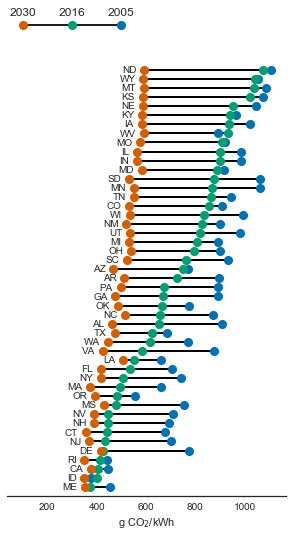

In [32]:
cpp_barbell.sort_values(by=2016, inplace=True)

states_index = list(cpp_barbell.index)

dumbell_plot(cpp_barbell, [2005, 2016, 2030], states_index, legend_loc=[500, 300, 100],
             rps_start={}, palette='colorblind')
plt.ylim(-1, 53)
sns.despine(left=True)
plt.xlabel('g CO$_2$/kWh')
plt.savefig(join('Figures', 'CPP comparison.png'), bbox_inches='tight')

In [133]:
annual_index.head()

final co2 (kg)  generation (mwh)  index (g/kwh)
state year                                                 
AK    2001    4.192005e+09        6743766.00     621.611811
      2002    3.829370e+09        6767322.00     565.861881
      2003    3.474673e+09        6338738.00     548.164719
      2004    3.492072e+09        6526716.92     535.042680
      2005    3.531411e+09        6576658.54     536.961208

In [25]:
barbell_index = annual_index.pivot_table(values='index (g/kwh)',
                                         index='state', columns='year')
barbell_index.sort_values(by=2016, inplace=True)
barbell_index.head()

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
state,,,,,,,,,,,,,,,,,
VT,8.743736,2.627368,3.897625,3.771958,2.429857,1.476818,1.767715,1.110861,1.029548,1.320526,3.708953,1.977452,2.194260,2.039138,2.234717,0.045758,2.135178
ID,51.435318,43.664890,61.658292,63.105693,60.315166,41.835663,63.835538,62.783701,56.541860,60.543140,30.741912,52.210648,91.333058,68.615808,99.783821,83.877284,64.987691
WA,173.633562,113.294680,150.420220,142.919267,146.032345,92.690902,115.674114,121.387705,127.526532,134.104945,65.860236,53.999613,105.465700,100.592130,101.103264,86.294714,44.817073
NH,307.386766,302.778174,368.752308,351.089029,347.605031,321.322464,295.556040,287.388290,269.835337,247.680499,258.125270,226.485267,174.075268,171.371126,178.672539,120.852171,105.324434
ME,317.868817,304.257725,315.112776,273.592657,258.293237,213.652802,217.593255,209.516342,213.732647,214.154573,195.897562,181.469823,162.097078,158.881520,155.818835,134.455210,59.553277


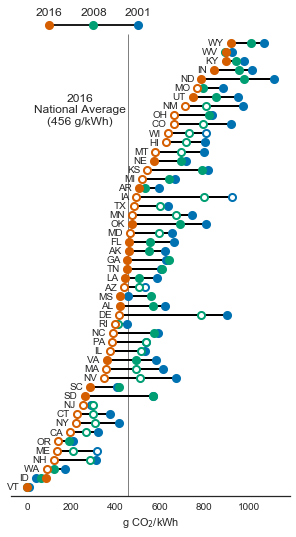

In [9]:
states_index = list(barbell_index.index)

dumbell_plot(barbell_index, [2001, 2008, 2016], states_index, 
             legend_loc=[500, 300, 100],
             rps_start=rps_start, palette='colorblind')

plt.vlines(456, -1, 50, colors=['0.5'], zorder=1, #linestyles='dashed',
           linewidth=1)

plt.ylim(-1, 53)
plt.text(x=240, y=40, s='2016\nNational Average\n(456 g/kWh)', ha='center')
sns.despine(left=True)
plt.xlabel('g CO$_2$/kWh')
plt.savefig(join('Figures', 'State CO2 intensity.pdf'), bbox_inches='tight')

## Largest and smallest changes

In [10]:
barbell_index['change'] = barbell_index[2016] - barbell_index[2001]
barbell_index['% change'] = barbell_index['change'] / barbell_index[2001]

In [12]:
max_change_state = barbell_index.sort_values('change').index[0]
max_change_value = barbell_index.sort_values('change')['change'].values[0]
start = barbell_index.loc[max_change_state, 2001]
end = barbell_index.loc[max_change_state, 2016]
print('The largest absolute reduction is {:0.1f} g/kWh in {}, from {:.1f} to {:.1f}'
      .format(max_change_value, max_change_state, start, end))

The largest absolute reduction is -485.0 g/kWh in DE, from 901.2 to 416.2


In [13]:
min_change_state = barbell_index.sort_values('change').index[-1]
min_change_value = barbell_index.sort_values('change')['change'].values[-1]
start = barbell_index.loc[min_change_state, 2001]
end = barbell_index.loc[min_change_state, 2016]
print('The smallest absolute reduction is {:0.1f} g/kWh in {}, from {:.1f} to {:.1f}'
      .format(min_change_value, min_change_state, start, end))

The smallest absolute reduction is 43.2 g/kWh in ID, from 41.2 to 84.5


In [14]:
max_relchange_state = barbell_index.sort_values('% change').index[0]
max_relchange_value = barbell_index.sort_values('% change')['% change'].values[0]
start = barbell_index.loc[max_relchange_state, 2001]
end = barbell_index.loc[max_relchange_state, 2016]
print('The largest relative reduction is {:0.1%} g/kWh in {}, from {:.1f} to {:.1f}'
      .format(max_relchange_value, max_relchange_state, start, end))

The largest relative reduction is -93.4% g/kWh in VT, from 8.7 to 0.6


In [15]:
min_relchange_state = barbell_index.sort_values('% change').index[-1]
min_relchange_value = barbell_index.sort_values('% change')['% change'].values[-1]
start = barbell_index.loc[min_relchange_state, 2001]
end = barbell_index.loc[min_relchange_state, 2016]
print('The smallest relative reduction is {:0.1%} g/kWh in {}, from {:.1f} to {:.1f}'
      .format(min_relchange_value, min_relchange_state, start, end))

The smallest relative reduction is 104.9% g/kWh in ID, from 41.2 to 84.5


## Do RPS states decrease CO<sub>2</sub> intensity more?

In [43]:
# Create dictionaries with the states that do/do not have RPS programs each 
# year.
state_list = us_state_abbrev.values()
yes_rps = {}
no_rps = {}
for year in range(2001, 2017):
    yes_rps[year] = []
    no_rps[year] = []
    for state in state_list:
        if state in rps_start:
            if rps_start[state] <= year:
                yes_rps[year].append(state)
            else:
                no_rps[year].append(state)
        else:
            no_rps[year].append(state)

In [48]:
def index_change(year, states, df, RPS_status):

    prev_year = year - 1
    current = df.loc[(df['year'] == year) &
                         (df['state'].isin(states)), ['state', 'index (g/kwh)']]
    current.index = current['state']
    prev = df.loc[(df['year'] == prev_year) &
                         (df['state'].isin(states)), ['state', 'index (g/kwh)']]
    prev.index = prev['state']
    
    difference = pd.DataFrame()
    difference['index'] = current['index (g/kwh)']
    difference['index change'] = current['index (g/kwh)'] - prev['index (g/kwh)']
    difference['relative change'] = (difference['index change']
                                     / prev['index (g/kwh)'])
    difference['year'] = year
    difference['RPS'] = RPS_status
    return difference

def all_rps_change(df, years=range(2002, 2017)):
    rps_effect_tidy = pd.concat([index_change(year, yes_rps[year], df, 'Yes') 
                                 for year in years]
                                + [index_change(year, no_rps[year], df, 'No') 
                                   for year in years])
    
    return rps_effect_tidy

### Look at all years from 2002-2016

In [49]:
rps_effect_all = all_rps_change(annual_index.reset_index())

In [50]:
rps_effect_all.describe()

,index,index change,relative change,year
count,750.000000,750.000000,750.000000,750.000000
mean,549.159942,-12.161317,-0.019962,2009.000000
std,245.213897,29.358948,0.131329,4.323377
min,0.045758,-150.529761,-0.979524,2002.000000
25%,406.430008,-27.390555,-0.052753,2005.000000
50%,548.978323,-9.067943,-0.016555,2009.000000
75%,729.454497,3.503689,0.007083,2013.000000
max,1090.429942,99.177918,1.808693,2016.000000


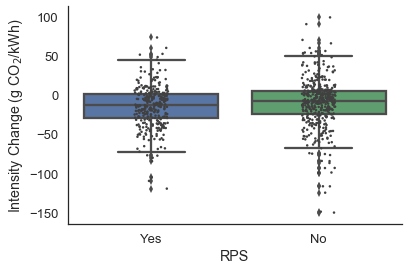

In [51]:
with sns.plotting_context('talk'):
    sns.boxplot(x='RPS', y='index change', data=rps_effect_all)
    sns.stripplot(x='RPS', y='index change', data=rps_effect_all, 
                  color='0.25', size=2.5, jitter=True)
    sns.despine()
    plt.ylabel('Intensity Change (g CO$_2$/kWh)')
# plt.savefig(join(fig_export_path,
#                  'Index change RPS boxplot.pdf'), bbox_inches='tight')

### Test statistical significance across all years

Across all years available, the null hypothesis (that the two samples are drawn from the same distribution) can be rejected using both the 2-sample KS (p=0.009) and the Anderson-Darling tests (significance = 0.004).

The Bayesian 95% confidence intervals for the mean overlap slightly (-17.4, -12.5) and (-12.6, -7.7).

The bootstrapped (BCA method) 95% confidence intervals for the mean also overlap (-17.9, -12.0) and (-13.2, -7.3).

In [53]:
from scipy import stats
import scikits.bootstrap as boot

In [54]:
yes_all = rps_effect_all.loc[rps_effect_all['RPS'] == 'Yes', 'index change']
no_all = rps_effect_all.loc[rps_effect_all['RPS'] == 'No', 'index change']

stats.ks_2samp(yes_all, no_all)

Ks_2sampResult(statistic=0.12008757525998909, pvalue=0.0093098892246054766)

In [55]:
stats.anderson_ksamp([yes_all, no_all])

/Users/Home/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/morestats.py:1694: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


Anderson_ksampResult(statistic=4.8079981928181752, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.004203186119085494)

In [56]:
yes_all.mean(), no_all.mean()

(-14.968333565839469, -10.128650634847972)

In [57]:
stats.bayes_mvs(yes_all), stats.bayes_mvs(no_all)

((Mean(statistic=-14.968333565839469, minmax=(-17.435170633934408, -12.50149649774453)),
  Variance(statistic=708.83576605575649, minmax=(620.65981076303058, 807.29458314138856)),
  Std_dev(statistic=26.602645037258895, minmax=(24.913044991791558, 28.412929858453328))),
 (Mean(statistic=-10.128650634847972, minmax=(-12.587741733407977, -7.6695595362879665)),
  Variance(statistic=972.5992473287605, minmax=(868.87610124674222, 1086.526134042173)),
  Std_dev(statistic=31.168480969582077, minmax=(29.476704382388849, 32.962495870946626))))

In [58]:
boot.ci(yes_all), boot.ci(no_all)

(array([-17.89376789, -12.08293428]), array([-13.16641064,  -7.31706141]))

In [59]:
boot.ci(yes_all, np.median), boot.ci(no_all, np.median)

(array([-16.06619819,  -9.09808232]), array([-9.40892997, -5.08379225]))

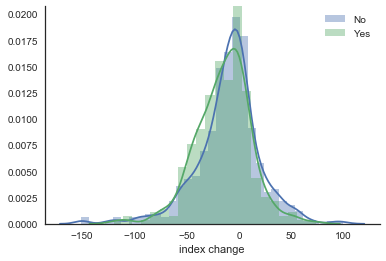

In [60]:
sns.distplot(no_all, label='No')
sns.distplot(yes_all, label='Yes')

plt.legend()
sns.despine()

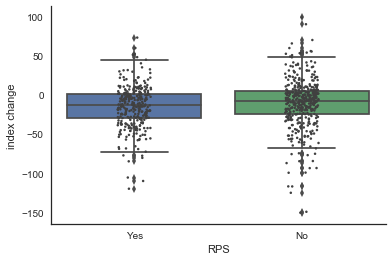

In [62]:
sns.boxplot(x='RPS', y='index change', data=rps_effect_all, )
sns.stripplot(x='RPS', y='index change', data=rps_effect_all, 
              jitter=True, size=2.5, color='0.25')
sns.despine()

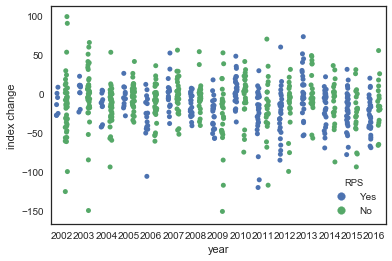

In [63]:
sns.stripplot(x='year', y='index change', hue='RPS', jitter=True, dodge=True, data=rps_effect_all)

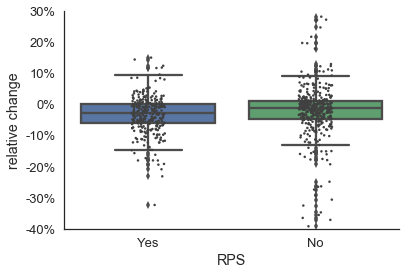

In [64]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots()
    sns.boxplot(x='RPS', y='relative change', data=rps_effect_all)
    sns.stripplot(x='RPS', y='relative change', data=rps_effect_all, 
                  color='0.25', size=2.5, jitter=True)
    sns.despine()
    plt.ylim(-0.4, 0.3)
    loc, _ = plt.yticks()
    new_labels = ['{:.0%}'.format(y) for y in ax.get_yticks()]
    plt.yticks(loc, new_labels)
# plt.savefig(join('Figures', 'relative change RPS boxplot.pdf'),
#             bbox_inches='tight')

#### Progressively leave out earlier years

/Users/Home/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/morestats.py:1694: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


For 2002-2016, the KS p-value is 0.031 and Anderson is 0.005
For 2003-2016, the KS p-value is 0.011 and Anderson is 0.002
For 2004-2016, the KS p-value is 0.023 and Anderson is 0.005
For 2005-2016, the KS p-value is 0.015 and Anderson is 0.003
For 2006-2016, the KS p-value is 0.041 and Anderson is 0.011
For 2007-2016, the KS p-value is 0.150 and Anderson is 0.037
For 2008-2016, the KS p-value is 0.189 and Anderson is 0.060
For 2009-2016, the KS p-value is 0.258 and Anderson is 0.191
For 2010-2016, the KS p-value is 0.251 and Anderson is 0.245
For 2011-2016, the KS p-value is 0.310 and Anderson is 0.191
For 2012-2016, the KS p-value is 0.419 and Anderson is 0.240
For 2013-2016, the KS p-value is 0.660 and Anderson is 0.552
For 2014-2016, the KS p-value is 0.636 and Anderson is 0.390


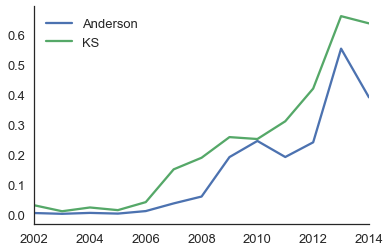

In [91]:
ks_list = []
an_list = []
for year in range(2002, 2015):
    rps_effect_temp = all_rps_change(annual_index,
                                     years=range(year, 2017))
    
    yes_temp = rps_effect_temp.loc[rps_effect_temp['RPS'] == 'Yes',
                                   'index change']
    no_temp = rps_effect_temp.loc[rps_effect_temp['RPS'] == 'No',
                                  'index change']
    
    _, ks_p = stats.ks_2samp(yes_temp, no_temp)
    _, _, an_p = stats.anderson_ksamp([yes_temp, no_temp])
    ks_list.append(ks_p)
    an_list.append(an_p)
    
    print('For {}-2016, the KS p-value is {:.3f} and Anderson is {:.3f}'
          .format(year, ks_p, an_p))
    
data = {'KS': ks_list,
        'Anderson': an_list}

p_over_time = pd.DataFrame(data, index=range(2002, 2015))
with sns.plotting_context('talk'):
    p_over_time.plot()
    sns.despine()

/Users/Home/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/morestats.py:1694: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


For 2002-2016, the KS p-value is 0.009 and Anderson is 0.004
For 2003-2016, the KS p-value is 0.003 and Anderson is 0.002
For 2004-2016, the KS p-value is 0.009 and Anderson is 0.005
For 2005-2016, the KS p-value is 0.004 and Anderson is 0.003
For 2006-2016, the KS p-value is 0.016 and Anderson is 0.010
For 2007-2016, the KS p-value is 0.057 and Anderson is 0.026
For 2008-2016, the KS p-value is 0.086 and Anderson is 0.040
For 2009-2016, the KS p-value is 0.268 and Anderson is 0.142
For 2010-2016, the KS p-value is 0.265 and Anderson is 0.170
For 2011-2016, the KS p-value is 0.331 and Anderson is 0.114
For 2012-2016, the KS p-value is 0.274 and Anderson is 0.134
For 2013-2016, the KS p-value is 0.700 and Anderson is 0.434
For 2014-2016, the KS p-value is 0.519 and Anderson is 0.267


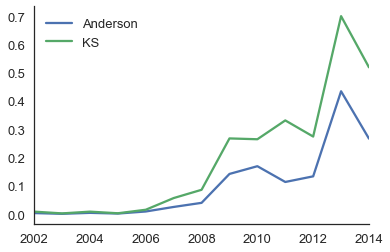

In [66]:
ks_list = []
an_list = []
for year in range(2002, 2015):
    rps_effect_temp = all_rps_change(annual_index.reset_index(),
                                     years=range(year, 2017))
    
    yes_temp = rps_effect_temp.loc[rps_effect_temp['RPS'] == 'Yes',
                                   'index change']
    no_temp = rps_effect_temp.loc[rps_effect_temp['RPS'] == 'No',
                                  'index change']
    
    _, ks_p = stats.ks_2samp(yes_temp, no_temp)
    _, _, an_p = stats.anderson_ksamp([yes_temp, no_temp])
    ks_list.append(ks_p)
    an_list.append(an_p)
    
    print('For {}-2016, the KS p-value is {:.3f} and Anderson is {:.3f}'
          .format(year, ks_p, an_p))
    
data = {'KS': ks_list,
        'Anderson': an_list}

p_over_time = pd.DataFrame(data, index=range(2002, 2015))
with sns.plotting_context('talk'):
    p_over_time.plot()
    sns.despine()

#### Progressively leave out later years

For 2002-2016, the KS p-value is 0.037 and Anderson is 0.024
For 2002-2015, the KS p-value is 0.047 and Anderson is 0.030
For 2002-2014, the KS p-value is 0.029 and Anderson is 0.050
For 2002-2013, the KS p-value is 0.010 and Anderson is 0.013
For 2002-2012, the KS p-value is 0.144 and Anderson is 0.067
For 2002-2011, the KS p-value is 0.300 and Anderson is 0.136
For 2002-2010, the KS p-value is 0.042 and Anderson is 0.021
For 2002-2009, the KS p-value is 0.279 and Anderson is 0.130


/Users/Home/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/morestats.py:1694: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


For 2002-2008, the KS p-value is 0.663 and Anderson is 0.481
For 2002-2007, the KS p-value is 0.599 and Anderson is 0.309
For 2002-2006, the KS p-value is 0.533 and Anderson is 0.407
For 2002-2005, the KS p-value is 0.673 and Anderson is 0.426
For 2002-2004, the KS p-value is 0.323 and Anderson is 0.280
For 2002-2003, the KS p-value is 0.234 and Anderson is 0.407


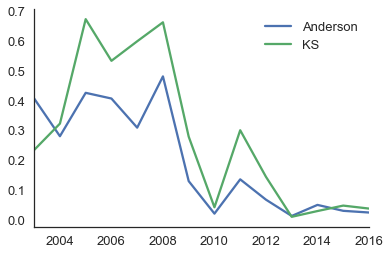

In [68]:
ks_list = []
an_list = []
for year in reversed(range(2003, 2017)):
    rps_effect_temp = all_rps_change(annual_index.reset_index(),
                                     years=range(2002, year))
    
    yes_temp = rps_effect_temp.loc[rps_effect_temp['RPS'] == 'Yes',
                                   'index change']
    no_temp = rps_effect_temp.loc[rps_effect_temp['RPS'] == 'No',
                                  'index change']
    
    _, ks_p = stats.ks_2samp(yes_temp, no_temp)
    _, _, an_p = stats.anderson_ksamp([yes_temp, no_temp])
    ks_list.append(ks_p)
    an_list.append(an_p)
    
    print('For 2002-{}, the KS p-value is {:.3f} and Anderson is {:.3f}'
          .format(year, ks_p, an_p))

data = {'KS': ks_list,
        'Anderson': an_list}

p_over_time = pd.DataFrame(data, index=reversed(range(2003, 2017)))
p_over_time.sort_index(inplace=True)
with sns.plotting_context('talk'):
    p_over_time.plot()
    sns.despine()

For 2002-2016, the KS p-value is 0.104 and Anderson is 0.028
For 2002-2015, the KS p-value is 0.074 and Anderson is 0.031
For 2002-2014, the KS p-value is 0.029 and Anderson is 0.032
For 2002-2013, the KS p-value is 0.009 and Anderson is 0.009


/Users/Home/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/morestats.py:1694: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


For 2002-2012, the KS p-value is 0.079 and Anderson is 0.046
For 2002-2011, the KS p-value is 0.179 and Anderson is 0.113
For 2002-2010, the KS p-value is 0.042 and Anderson is 0.017
For 2002-2009, the KS p-value is 0.356 and Anderson is 0.115
For 2002-2008, the KS p-value is 0.722 and Anderson is 0.453
For 2002-2007, the KS p-value is 0.672 and Anderson is 0.297
For 2002-2006, the KS p-value is 0.825 and Anderson is 0.496
For 2002-2005, the KS p-value is 0.760 and Anderson is 0.537
For 2002-2004, the KS p-value is 0.609 and Anderson is 0.409
For 2002-2003, the KS p-value is 0.234 and Anderson is 0.442


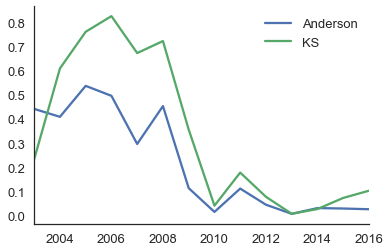

In [273]:
ks_list = []
an_list = []
for year in reversed(range(2003, 2017)):
    rps_effect_temp = all_rps_change(annual_index,
                                     years=range(2002, year))
    
    yes_temp = rps_effect_temp.loc[rps_effect_temp['RPS'] == 'Yes',
                                   'index change']
    no_temp = rps_effect_temp.loc[rps_effect_temp['RPS'] == 'No',
                                  'index change']
    
    _, ks_p = stats.ks_2samp(yes_temp, no_temp)
    _, _, an_p = stats.anderson_ksamp([yes_temp, no_temp])
    ks_list.append(ks_p)
    an_list.append(an_p)
    
    print('For 2002-{}, the KS p-value is {:.3f} and Anderson is {:.3f}'
          .format(year, ks_p, an_p))

data = {'KS': ks_list,
        'Anderson': an_list}

p_over_time = pd.DataFrame(data, index=reversed(range(2003, 2017)))
p_over_time.sort_index(inplace=True)
with sns.plotting_context('talk'):
    p_over_time.plot()
    sns.despine()

### Repeat, but only looking at 2008-present

In [69]:
rps_effect_recent = all_rps_change(annual_index.reset_index(),
                                   years=range(2008, 2017))

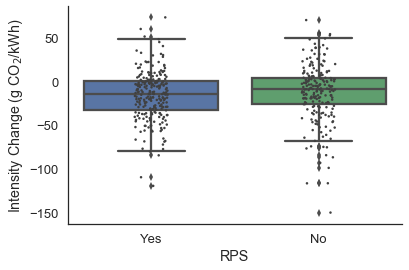

In [205]:
with sns.plotting_context('talk'):
    sns.boxplot(x='RPS', y='index change', data=rps_effect_recent)
    sns.stripplot(x='RPS', y='index change', data=rps_effect_recent, 
                  color='0.25', size=2.5, jitter=True)
    sns.despine()
    plt.ylabel('Intensity Change (g CO$_2$/kWh)')
plt.savefig(join(fig_export_path, 'SI',
                 'Index change RPS boxplot.pdf'), bbox_inches='tight')

#### Test statistical significance across 2008-2016

Across 2008-2016, the null hypothesis (that the two samples are drawn from the same distribution) cannot be rejected using the 2-sample KS test (p=0.08), although the Anderson-Darling test indicates it's possible (significance = 0.04).

The Bayesian 95% confidence intervals for the mean overlap (-19.3, -13.5) and (-16.1, -8.7).

The bootstrapped (BCA method) 95% confidence intervals for the mean also overlap (-19.9, -13.0) and (-16.9, -8.2).

In [71]:
yes_recent = rps_effect_recent.loc[rps_effect_recent['RPS'] == 'Yes', 'index change']
no_recent = rps_effect_recent.loc[rps_effect_recent['RPS'] == 'No', 'index change']

stats.ks_2samp(yes_recent, no_recent)

Ks_2sampResult(statistic=0.11701641882904168, pvalue=0.086442979991134344)

In [72]:
stats.anderson_ksamp([yes_recent, no_recent])

Anderson_ksampResult(statistic=2.1885921194583853, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.0403291007418469)

In [73]:
stats.bayes_mvs(yes_recent), stats.bayes_mvs(no_recent)

((Mean(statistic=-16.402793001764444, minmax=(-19.326590550776483, -13.478995452752404)),
  Variance(statistic=761.95996536023199, minmax=(654.35523486281488, 884.03312743243907)),
  Std_dev(statistic=27.574642230141812, minmax=(25.580368153386981, 29.732694587481284))),
 (Mean(statistic=-12.40474369083786, minmax=(-16.108391840333237, -8.7010955413424824)),
  Variance(statistic=1060.4009346143766, minmax=(900.25017154654563, 1243.7918380681108)),
  Std_dev(statistic=32.524302867642788, minmax=(30.004169236066939, 35.26743310857924))))

In [156]:
boot.ci(yes_recent), boot.ci(no_recent)

(array([-19.90953585, -12.86449403]), array([-16.88734543,  -8.19334096]))

In [75]:
boot.ci(yes_recent, np.median), boot.ci(no_recent, np.median)

(array([-19.07547632, -11.0931963 ]), array([-13.29278131,  -5.55941085]))

In [76]:
yes_recent.mean(), no_recent.mean()

(-16.402793001764444, -12.40474369083786)

In [77]:
len(yes_recent), len(no_recent)

(241, 209)

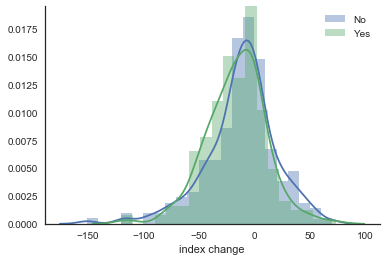

In [78]:
sns.distplot(no_recent, label='No')
sns.distplot(yes_recent, label='Yes')

plt.legend()
sns.despine()

In [79]:
(pd.concat([yes_recent, no_recent])).mean()

-14.545921210689654

Plotting the relative change from previous year. Manually shrinking the y-limits because there are some very large(small) values from states with small absolute CO₂ intensity

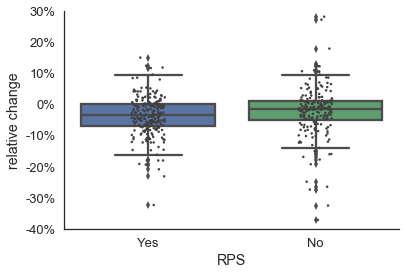

In [80]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots()
    sns.boxplot(x='RPS', y='relative change', data=rps_effect_recent)
    sns.stripplot(x='RPS', y='relative change', data=rps_effect_recent, 
                  color='0.25', size=2.5, jitter=True)
    sns.despine()
    plt.ylim(-0.4, 0.3)
    loc, _ = plt.yticks()
    new_labels = ['{:.0%}'.format(y) for y in ax.get_yticks()]
    plt.yticks(loc, new_labels)
# plt.savefig(join(fig_export_path, 'Relative change RPS boxplot.pdf'),
#             bbox_inches='tight')

### Repeat, but only looking at 2002-2008

In [81]:
rps_effect_early = all_rps_change(annual_index.reset_index(),
                                  years=range(2002, 2009))

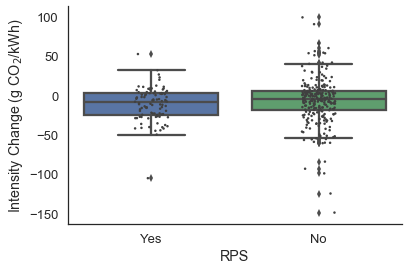

In [82]:
with sns.plotting_context('talk'):
    sns.boxplot(x='RPS', y='index change', data=rps_effect_early)
    sns.stripplot(x='RPS', y='index change', data=rps_effect_early, 
                  color='0.25', size=2.5, jitter=True)
    sns.despine()
    plt.ylabel('Intensity Change (g CO$_2$/kWh)')
# plt.savefig(join('Figures', 'SI',
#                  'Index change RPS boxplot.pdf'), bbox_inches='tight')

### Test statistical significance across 2002-2008

Across 2002-2008, the null hypothesis (that the two samples are drawn from the same distribution) cannot be rejected using both the 2-sample KS (p=0.28) and the Anderson-Darling tests (significance = 0.13).

The Bayesian 95% confidence intervals for the mean overlap (-14.7, -7.6) and (-10.5, -4.5).

The bootstrapped (BCA method) 95% confidence intervals for the mean also overlap (-15.7, -7.2) and (-11.1, -4.0).

In [83]:
yes_early = rps_effect_early.loc[rps_effect_early['RPS'] == 'Yes', 'index change']
no_early = rps_effect_early.loc[rps_effect_early['RPS'] == 'No', 'index change']

stats.ks_2samp(yes_early, no_early)

Ks_2sampResult(statistic=0.11696194225721784, pvalue=0.27885928636998436)

In [84]:
stats.anderson_ksamp([yes_early, no_early])

Anderson_ksampResult(statistic=0.97277810605101123, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.12961754544832851)

In [85]:
stats.bayes_mvs(yes_early), stats.bayes_mvs(no_early)

((Mean(statistic=-11.172108814905123, minmax=(-14.749972861368587, -7.5942447684416594)),
  Variance(statistic=454.98093244842454, minmax=(356.31707303125205, 575.53484180142834)),
  Std_dev(statistic=21.273020686812853, minmax=(18.876362812556131, 23.990307246915958))),
 (Mean(statistic=-7.5117877127306674, minmax=(-10.495994780128351, -4.5275806453329857)),
  Variance(statistic=836.56094534577801, minmax=(721.31756921856663, 966.871556862886)),
  Std_dev(statistic=28.894569600434284, minmax=(26.857355961050345, 31.094558315931842))))

In [86]:
boot.ci(yes_early), boot.ci(no_early)

(array([-15.67290327,  -7.19308128]), array([-11.11203215,  -4.03434851]))

In [87]:
boot.ci(yes_early, np.median), boot.ci(no_early, np.median)

(array([-15.0678713 ,  -4.53775966]), array([-7.91527257, -2.67777655]))

In [88]:
yes_early.mean(), no_early.mean()

(-11.172108814905123, -7.5117877127306674)

In [89]:
len(yes_early), len(no_early)

(96, 254)

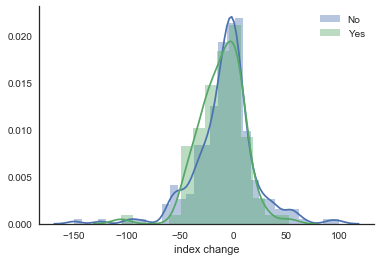

In [90]:
sns.distplot(no_early, label='No')
sns.distplot(yes_early, label='Yes')

plt.legend()
sns.despine()

### Repeat, but only looking at 2004-2008

In [98]:
rps_effect_early = all_rps_change(annual_index.reset_index(),
                                  years=range(2004, 2009))

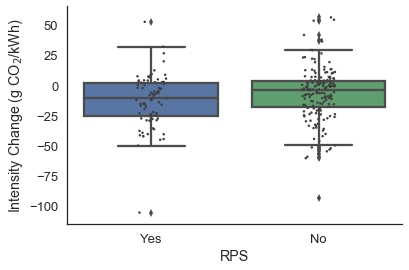

In [100]:
with sns.plotting_context('talk'):
    sns.boxplot(x='RPS', y='index change', data=rps_effect_early)
    sns.stripplot(x='RPS', y='index change', data=rps_effect_early, 
                  color='0.25', size=2.5, jitter=True)
    sns.despine()
    plt.ylabel('Intensity Change (g CO$_2$/kWh)')
# plt.savefig(join('Figures', 'SI',
#                  'Index change RPS boxplot.pdf'), bbox_inches='tight')

### Test statistical significance across 2004-2008

In [101]:
yes_early = rps_effect_early.loc[rps_effect_early['RPS'] == 'Yes', 'index change']
no_early = rps_effect_early.loc[rps_effect_early['RPS'] == 'No', 'index change']

stats.ks_2samp(yes_early, no_early)

Ks_2sampResult(statistic=0.1588235294117647, pvalue=0.11615374720169748)

In [102]:
stats.anderson_ksamp([yes_early, no_early])

Anderson_ksampResult(statistic=1.576304916520759, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.07192971539767894)

In [103]:
stats.bayes_mvs(yes_early, alpha=0.95), stats.bayes_mvs(no_early, alpha=0.95)

((Mean(statistic=-12.612271805288682, minmax=(-17.446805294104824, -7.77773831647254)),
  Variance(statistic=484.20900526751433, minmax=(353.49503449117014, 662.13496497852248)),
  Std_dev(statistic=21.933423471280484, minmax=(18.801463626302347, 25.731983308297917))),
 (Mean(statistic=-7.1489413665984678, minmax=(-10.446577814145439, -3.851304919051497)),
  Variance(statistic=480.04970825244715, minmax=(387.49452519896994, 594.29483925665261)),
  Std_dev(statistic=21.877261979119201, minmax=(19.684880624453122, 24.378163164124008))))

In [ ]:
boot.ci(yes_early), boot.ci(no_early)

In [ ]:
boot.ci(yes_early, np.median), boot.ci(no_early, np.median)

In [ ]:
yes_early.mean(), no_early.mean()

In [104]:
len(yes_early), len(no_early)

(80, 170)

In [251]:
len(yes_early), len(no_early)

(80, 170)

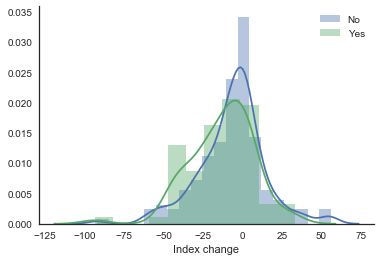

In [252]:
sns.distplot(no_early, label='No')
sns.distplot(yes_early, label='Yes')

plt.legend()
sns.despine()

## Gross state product data

In [157]:
us_state_abbrev = {
    'United States': 'US',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [165]:
path = os.path.join(base_path, 'Data storage', 'GDP data', 'gsp_naics_all_R',
                    'gsp_naics_all_R.csv')
gsp = pd.read_csv(path)
gsp = gsp.loc[gsp['IndustryId'] == 1]
gsp.drop(['GeoFIPS', 'Region', 'ComponentId', 'ComponentName', 'IndustryId',
          'IndustryClassification', 'Description'], axis=1, inplace=True)
gsp.rename(columns={'GeoName': 'state'}, inplace=True)
gsp = pd.melt(gsp, id_vars='state', var_name='year', value_name='GSP')
gsp['state'] = gsp['state'].map(us_state_abbrev)

for col in ['year', 'GSP']:
    gsp.loc[:, col] = pd.to_numeric(gsp.loc[:, col])

In [166]:
gsp.head()

,state,year,GSP
0,US,1997,11118778
1,AL,1997,137143
2,AK,1997,37880
3,AZ,1997,163114
4,AR,1997,79164


In [169]:
annual_index_gsp = (annual_index.reset_index()
                                .merge(gsp, on=['state', 'year']))

In [174]:
annual_index_gsp.head()

,state,year,final co2 (kg),generation (mwh),index (g/kwh),GSP
0,AK,2001,4.192005e+09,6743766.00,621.611811,37102
1,AK,2002,3.829370e+09,6767322.00,565.861881,38605
2,AK,2003,3.474673e+09,6338738.00,548.164719,38262
3,AK,2004,3.492072e+09,6526716.92,535.042680,39648
4,AK,2005,3.531411e+09,6576658.54,536.961208,40767


In [175]:
non_fuels = ['state', 'year', 'index (g/kwh)', 'GSP']
total_gen = annual_index.loc[:, 'generation (mwh)']

annual_index_gsp.loc[:, 'tonne CO2/mmUSD'] = (annual_index_gsp.loc[:, 'final co2 (kg)']
                                                  / annual_index_gsp.loc[:, 'GSP']
                                                  / 1000)

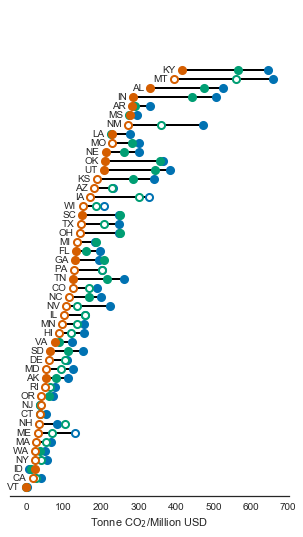

In [25]:
barbell_gsp = annual_gen_index_gsp.pivot_table(values='tonne CO2/mmUSD',
                                              index='state', columns='year')
barbell_gsp.sort_values(by=2016, inplace=True)
barbell_gsp.drop(['WY', 'ND', 'WV'], inplace=True)

states_gsp = list(barbell_gsp.index)

dumbell_plot(barbell_gsp, [2001, 2008, 2016], states_gsp, offset_divider=40,
             rps_start=rps_start, legend=False, palette='colorblind')

plt.ylim(-1, 53)
sns.despine(left=True)
plt.xlabel('Tonne CO$_2$/Million USD')

# plt.savefig(join(fig_export_path, 'SI', 'State CO2 per GSP.pdf'),
#             bbox_inches='tight')

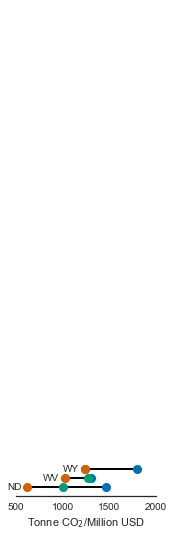

In [26]:
barbell_gsp = annual_gen_index_gsp.pivot_table(values='tonne CO2/mmUSD',
                                              index='state', columns='year')
barbell_gsp.sort_values(by=2016, inplace=True)
barbell_gsp = barbell_gsp.loc[['ND', 'WV', 'WY']]

states_gsp = ['ND', 'WV', 'WY']

dumbell_plot(barbell_gsp, [2001, 2008, 2016], states_gsp, offset_divider=30,
             rps_start=rps_start, legend=False, palette='colorblind',
             figsize=(2.5, 9))

plt.ylim(-1, 53)
plt.xlim(500, 2000)
sns.despine(left=True)
plt.xlabel('Tonne CO$_2$/Million USD')
# plt.savefig(join(fig_export_path, 'SI', 'State CO2 per GSP_inset.pdf'),
#             bbox_inches='tight')

(-1, 50)

(8, 1950)

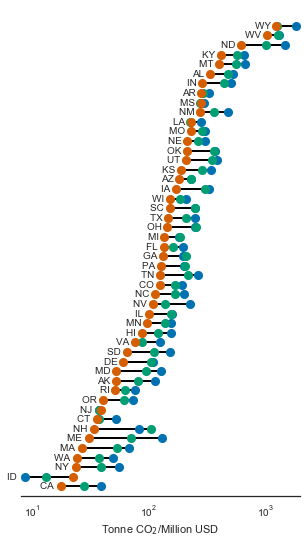

In [180]:
barbell_gsp = annual_gen_index_gsp.pivot_table(values='tonne CO2/mmUSD',
                                              index='state', columns='year')
barbell_gsp.sort_values(by=2016, inplace=True)
barbell_gsp.drop('VT', inplace=True)

index_2001 = barbell_gsp[2001]
index_2008 = barbell_gsp[2008]
index_2016 = barbell_gsp[2016]

# data = [barbell_gsp[year] for year in [2001, 2008, 2016]]
states_gsp = ['{}  '.format(state) for state in barbell_gsp.index]
# rps_states = list(rps_tidy['state'].unique())

dumbell_plot(barbell_gsp, [2001, 2008, 2016], states_gsp, offset_divider=4000,
             rps_start=rps_start, legend=False, palette='colorblind')

# plt.vlines(456, -1, 50, colors=['0.5'], zorder=1, #linestyles='dashed',
#            linewidth=1)
plt.ylim(-1, 50)
# plt.text(x=240, y=40, s='2016\nNational Average\n(456 g/kWh)', ha='center')
sns.despine(left=True)
plt.xlabel('Tonne CO$_2$/Million USD')
ax = plt.gca()
ax.set_xscale("log", nonposx='clip')
plt.xlim((8, 1950))

Are things changing because states got GSP changed or because electricity emissions changed. Scatter plot might be more appropriate. 

## Population

In [179]:
path = os.path.join(base_path, 'Data storage', 'Derived data',
                    'State population.csv')
pop = pd.read_csv(path)
pop.columns = pop.columns.str.lower()

In [180]:
pop.head()

,state,year,population
0,United States,2000,282162411
1,Alabama,2000,4452173
2,Alaska,2000,627963
3,Arizona,2000,5160586
4,Arkansas,2000,2678588


In [181]:
pop['state'] = pop['state'].map(us_state_abbrev)

In [182]:
pop.head()

,state,year,population
0,US,2000,282162411
1,AL,2000,4452173
2,AK,2000,627963
3,AZ,2000,5160586
4,AR,2000,2678588


In [184]:
annual_index_pop = annual_index.reset_index().merge(pop, on=['state', 'year'])

In [185]:
annual_index_pop.head()

,state,year,final co2 (kg),generation (mwh),index (g/kwh),population
0,AK,2001,4.192005e+09,6743766.00,621.611811,633714
1,AK,2002,3.829370e+09,6767322.00,565.861881,642337
2,AK,2003,3.474673e+09,6338738.00,548.164719,648414
3,AK,2004,3.492072e+09,6526716.92,535.042680,659286
4,AK,2005,3.531411e+09,6576658.54,536.961208,666946


In [187]:
annual_index_pop['tonne CO2/pop'] = (annual_index_pop['final co2 (kg)']
                                         / 1000
                                         / annual_index_pop['population'])
annual_index_pop['MWh/pop'] = (annual_index_pop.loc[:, 'generation (mwh)']
                                         / annual_index_pop['population'])

In [188]:
annual_index_pop.describe(percentiles=[.1, .25])

,year,final co2 (kg),generation (mwh),index (g/kwh),population,tonne CO2/pop,MWh/pop
count,800.000000,8.000000e+02,8.000000e+02,800.000000,8.000000e+02,800.000000,800.000000
mean,2008.500000,4.489618e+10,8.055049e+07,555.125769,6.082017e+06,10.828463,16.852116
std,4.612656,4.255378e+10,7.329949e+07,246.565865,6.718427e+06,13.625326,13.066174
min,2001.000000,8.502227e+04,1.736448e+06,0.048963,4.946570e+05,0.000136,2.780122
10%,2002.000000,3.584462e+09,1.035205e+07,214.112381,8.438739e+05,1.968371,7.319306
25%,2004.750000,1.478246e+10,3.359617e+07,409.270169,1.800205e+06,3.958390,9.959396
50%,2008.500000,3.599420e+10,5.720826e+07,554.604655,4.353254e+06,7.733279,14.516478
max,2016.000000,2.486677e+11,4.558160e+08,1111.411905,3.925002e+07,96.738933,90.521185


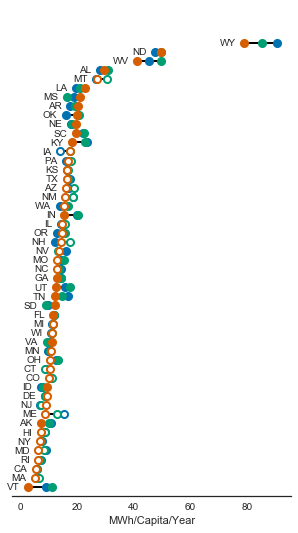

In [36]:
barbell_pop = annual_index_pop.pivot_table(values='MWh/pop',
                                              index='state', columns='year')
barbell_pop.sort_values(by=2016, inplace=True)
# barbell_pop.drop('VT', inplace=True)

# data = [barbell_pop[year] for year in [2001, 2008, 2016]]
states_pop = list(barbell_pop.index)
# rps_states = list(rps_tidy['state'].unique())

dumbell_plot(barbell_pop, [2001, 2008, 2016], states_pop, offset_divider=30,
             rps_start=rps_start, legend=False, palette='colorblind')

# plt.vlines(456, -1, 50, colors=['0.5'], zorder=1, #linestyles='dashed',
#            linewidth=1)
plt.ylim(-1, 53)
# plt.text(x=240, y=40, s='2016\nNational Average\n(456 g/kWh)', ha='center')
sns.despine(left=True)
plt.xlabel('MWh/Capita/Year')
# ax = plt.gca()
# ax.set_xscale("log", nonposx='clip')
path = join(fig_export_path, 'SI', 'State MWh per capita per year.pdf')
# plt.savefig(path, bbox_inches='tight')

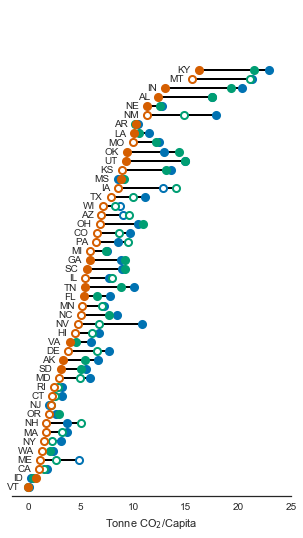

In [37]:
barbell_pop = annual_index_pop.pivot_table(values='tonne CO2/pop',
                                              index='state', columns='year')
barbell_pop.sort_values(by=2016, inplace=True)
barbell_pop.drop(['WY', 'ND', 'WV'], inplace=True)

# states_pop = ['{}  '.format(x) for x in barbell_pop.index]
states_pop = list(barbell_pop.index)
# rps_states = list(rps_tidy['state'].unique())

dumbell_plot(barbell_pop, [2001, 2008, 2016], states_pop, offset_divider=30,
             rps_start=rps_start, legend=False, palette='colorblind')

plt.ylim(-1, 53)
plt.xlim(None, 25)

sns.despine(left=True)
plt.xlabel('Tonne CO$_2$/Capita')
# plt.savefig(join(fig_export_path, 'SI', 'State CO2 per capita.pdf'),
#             bbox_inches='tight')

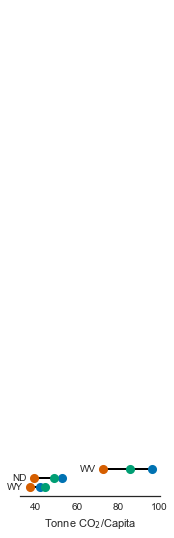

In [38]:
barbell_pop = annual_index_pop.pivot_table(values='tonne CO2/pop',
                                           index='state', columns='year')
barbell_pop.sort_values(by=2016, inplace=True)
barbell_pop = barbell_pop.loc[['WV', 'ND', 'WY']]

states_pop = ['WY', 'ND', 'WV']
# rps_states = list(rps_tidy['state'].unique())

dumbell_plot(barbell_pop, [2001, 2008, 2016], states_pop, offset_divider=30,
             rps_start=rps_start, legend=False, palette='colorblind',
             figsize=(2.5, 9))

plt.ylim(-1, 53)
# plt.xlim(None, 25)

sns.despine(left=True)
plt.xlabel('Tonne CO$_2$/Capita')
# plt.savefig(join(fig_export_path, 'SI', 'State CO2 per capita_inset.pdf'),
#             bbox_inches='tight')

## State electricity imports/exports
Data is from [EIA State Energy Data System](https://www.eia.gov/state/seds/seds-data-complete.php?sid=US#Consumption). 2016 Estimates will be available in October 2017. Code are described in [EIA documentation](https://www.eia.gov/state/seds/sep_use/notes/use_a.pdf). Negative values indicate flows out of the state.

In [192]:
path = os.path.join(base_path, 'Data storage', 'State energy flows',
                    'use_all_phy.csv')
flows = pd.read_csv(path)
flows = flows.loc[flows['MSN'] == 'ELISP']
flows.drop([str(x) for x in range(1960, 2001)], axis=1, inplace=True)
flows.drop(['Data_Status', 'MSN'], axis=1, inplace=True)

# Electricity flows are given in million kWh (see documentation)
flows.loc[:, '2001':] *= 1000

flows.columns = flows.columns.str.lower()

In [193]:
flows = flows.melt(id_vars='state', var_name='year',
                   value_name='MWh flow')
flows['year'] = flows['year'].astype(int)

In [194]:
flows.head()

,state,year,MWh flow
0,AK,2001,0
1,AL,2001,-35006000
2,AR,2001,-666000
3,AZ,2001,-23621000
4,CA,2001,75510000


In [196]:
annual_index_pop_flows = pd.merge(annual_index_pop, flows, on=['state', 'year'])
annual_index_pop_flows['MWh flow/pop'] = (annual_index_pop_flows['MWh flow']
                                          / annual_index_pop_flows['population'])
annual_index_pop_flows['share flow'] = (annual_index_pop_flows['MWh/pop']
                                          / annual_index_pop_flows['MWh flow/pop'])

In [197]:
annual_index_pop_flows.head()

,state,year,final co2 (kg),generation (mwh),index (g/kwh),population,tonne CO2/pop,MWh/pop,MWh flow,MWh flow/pop,share flow
0,AK,2001,4.192005e+09,6743766.00,621.611811,633714,6.614979,10.641655,0,0.0,inf
1,AK,2002,3.829370e+09,6767322.00,565.861881,642337,5.961621,10.535470,0,0.0,inf
2,AK,2003,3.474673e+09,6338738.00,548.164719,648414,5.358725,9.775757,0,0.0,inf
3,AK,2004,3.492072e+09,6526716.92,535.042680,659286,5.296748,9.899675,0,0.0,inf
4,AK,2005,3.531411e+09,6576658.54,536.961208,666946,5.294897,9.860856,0,0.0,inf


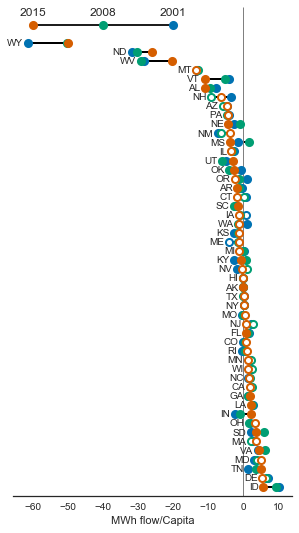

In [44]:
barbell_flows = annual_index_pop_flows.pivot_table(values='MWh flow/pop',
                                              index='state', columns='year')
barbell_flows.sort_values(by=2015, ascending=False, inplace=True)
# barbell_flows.drop('VT', inplace=True)

states_flows = list(barbell_flows.index)

dumbell_plot(barbell_flows, [2001, 2008, 2015], states_flows, offset_divider=8,
             rps_start=rps_start, legend=True, palette='colorblind',
             legend_loc=[-20, -40, -60])

plt.ylim(-1, 53)
sns.despine(left=True)
plt.xlabel('MWh flow/Capita')
plt.vlines(0, -1, 53, colors=['0.5'], linewidth=1)
# plt.xticks()
# ax = plt.gca()
# ax.set_xscale("log", nonposx='clip')
path = join(fig_export_path, 'SI', 'State MWh flow per capita.pdf')
# plt.savefig(path, bbox_inches='tight')

In [198]:
annual_index_pop_flows.describe()

,year,final co2 (kg),generation (mwh),index (g/kwh),population,tonne CO2/pop,MWh/pop,MWh flow,MWh flow/pop,share flow
count,750.000000,7.500000e+02,7.500000e+02,750.000000,7.500000e+02,750.000000,750.000000,7.500000e+02,750.000000,750.000000
mean,2008.000000,4.540436e+10,8.045614e+07,561.748376,6.057556e+06,10.972597,16.909980,-2.433827e+05,-2.645003,inf
std,4.323377,4.287599e+10,7.302504e+07,246.760512,6.684421e+06,13.732218,13.116742,2.291679e+07,10.107309,NaN
min,2001.000000,4.779453e+06,2.036377e+06,1.029548,4.946570e+05,0.007634,3.252542,-6.790100e+07,-61.493115,-3251.028410
25%,2004.000000,1.485866e+10,3.356522e+07,414.291234,1.797654e+06,4.008645,9.981312,-9.621750e+06,-3.066595,-4.774674
50%,2008.000000,3.623631e+10,5.678882e+07,560.765144,4.332868e+06,7.812864,14.543854,0.000000e+00,0.000000,1.134967
75%,2012.000000,6.168011e+10,1.092996e+08,740.889661,6.748240e+06,12.252263,18.052115,1.132125e+07,2.027638,7.633464
max,2015.000000,2.486677e+11,4.500498e+08,1111.411905,3.899394e+07,96.738933,90.521185,9.021000e+07,10.371511,inf


## Other analysis

In [199]:
pop.head()

,state,year,population
0,US,2000,282162411
1,AL,2000,4452173
2,AK,2000,627963
3,AZ,2000,5160586
4,AR,2000,2678588


In [200]:
gsp.head()

,state,year,GSP
0,US,1997,11118778
1,AL,1997,137143
2,AK,1997,37880
3,AZ,1997,163114
4,AR,1997,79164


In [201]:
annual_index.head()

final co2 (kg)  generation (mwh)  index (g/kwh)
state year                                                 
AK    2001    4.192005e+09        6743766.00     621.611811
      2002    3.829370e+09        6767322.00     565.861881
      2003    3.474673e+09        6338738.00     548.164719
      2004    3.492072e+09        6526716.92     535.042680
      2005    3.531411e+09        6576658.54     536.961208

In [202]:
total_gen_pop = pd.merge(annual_index.reset_index(), pop,
                         on=['state', 'year'])
total_gen_pop_gsp = pd.merge(total_gen_pop, gsp, on=['state', 'year'])

In [203]:
total_gen_pop_gsp.head()

,state,year,final co2 (kg),generation (mwh),index (g/kwh),population,GSP
0,AK,2001,4.192005e+09,6743766.00,621.611811,633714,37102
1,AK,2002,3.829370e+09,6767322.00,565.861881,642337,38605
2,AK,2003,3.474673e+09,6338738.00,548.164719,648414,38262
3,AK,2004,3.492072e+09,6526716.92,535.042680,659286,39648
4,AK,2005,3.531411e+09,6576658.54,536.961208,666946,40767


/Users/Home/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


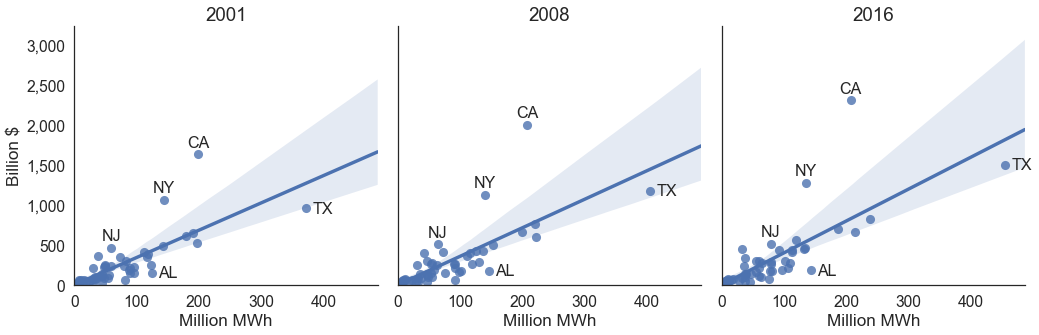

In [74]:
years = [2001, 2008, 2016]
temp = total_gen_pop_gsp.loc[total_gen_pop_gsp['year'].isin(years)]
idx = pd.IndexSlice

with sns.plotting_context(context='talk', font_scale=1.2):
    g = sns.lmplot(x='Generation', y='GSP', data=temp, col='year')
    g.set(xlim=(0, None), ylim=(0, None))
    
    # Change the tick and axis labels
    ax = plt.gca()
    x_ticks = ax.get_xticks()
    y_ticks = ax.get_yticks()
    g.set_xticklabels(['{:.0f}'.format(x/1e6) for x in x_ticks])
    g.set_yticklabels(['{:,}'.format(int(y/1e3)) for y in y_ticks])
    g.set_axis_labels('Million MWh', 'Billion $')
    
    # Set index to make accessing individual states/years easier
    temp.set_index(['state', 'year'], inplace=True)
    temp.sort_index(inplace=True)
    
    for year, ax in zip(years, g.axes.flatten()):
        ax.set_title(str(year))
        
        # Labels above point
        for state in ['CA', 'NY', 'NJ']:
            x = (temp.loc[idx[state, year], 'Generation'])
            y = (temp.loc[idx[state, year], 'GSP']
                 + ax.get_ylim()[1] * 0.03)
            ax.text(x, y, state, horizontalalignment='center', fontsize=16)
        
        # Labels to the right of point
        for state in ['AL', 'TX']:
            x = (temp.loc[idx[state, year], 'Generation']
                 + ax.get_xlim()[1] * 0.02)
            y = (temp.loc[idx[state, year], 'GSP'])
            ax.text(x, y, state, verticalalignment='center', fontsize=16)
    
path = join(fig_export_path, 'SI', 'State generation vs GSP.pdf')
plt.savefig(path, bbox_inches='tight')

In [204]:
total_gen.head()

state  year
AK     2001    6743766.00
       2002    6767322.00
       2003    6338738.00
       2004    6526716.92
       2005    6576658.54
Name: generation (mwh), dtype: float64